In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-power-generation-data/Plant_2_Generation_Data.csv
/kaggle/input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv


# Reading data

In [2]:
gen1 = pd.read_csv("/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv")
gen1['DATE_TIME']= pd.to_datetime(gen1['DATE_TIME'], format='%d-%m-%Y %H:%M', errors='raise')
gen1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
weather1 = pd.read_csv("/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv")
weather1['DATE_TIME']= pd.to_datetime(weather1['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='raise')
weather1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


# Merging data

In [4]:
plant1 = pd.merge(gen1, weather1, on=['DATE_TIME', 'PLANT_ID'], how='inner')
plant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [5]:
plant1.nunique()

DATE_TIME               3157
PLANT_ID                   1
SOURCE_KEY_x              22
DC_POWER               32906
AC_POWER               32683
DAILY_YIELD            29899
TOTAL_YIELD            37263
SOURCE_KEY_y               1
AMBIENT_TEMPERATURE     3157
MODULE_TEMPERATURE      3157
IRRADIATION             1755
dtype: int64

# Droping columns 

In [6]:
plant1.drop(['PLANT_ID', 'SOURCE_KEY_x', 'SOURCE_KEY_y'], axis=1, inplace=True)
plant1.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0


# Visualizing Parameters

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

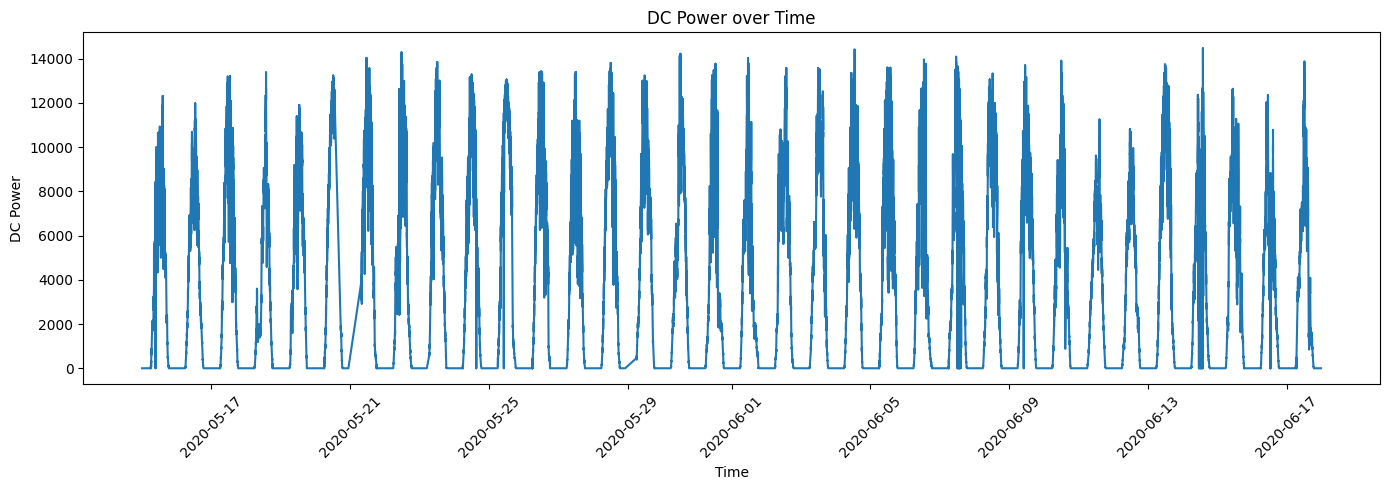

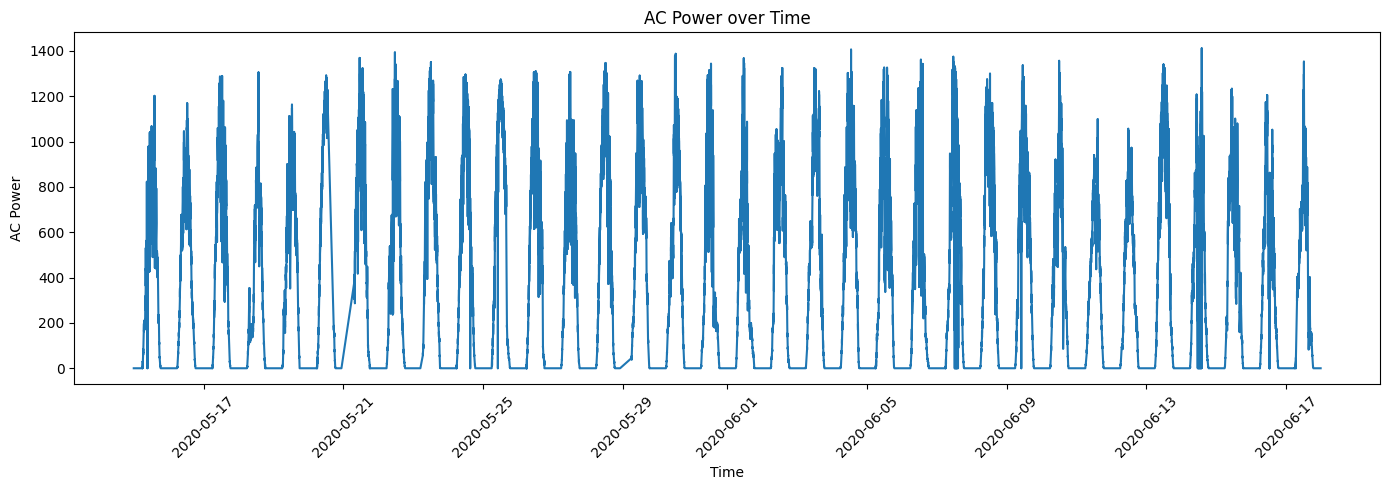

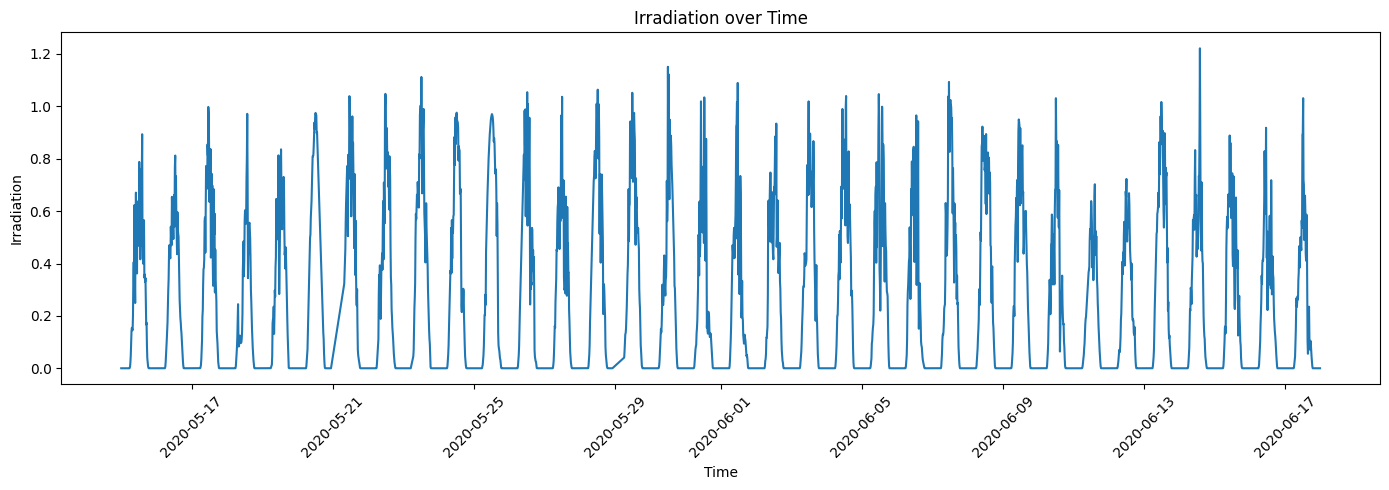

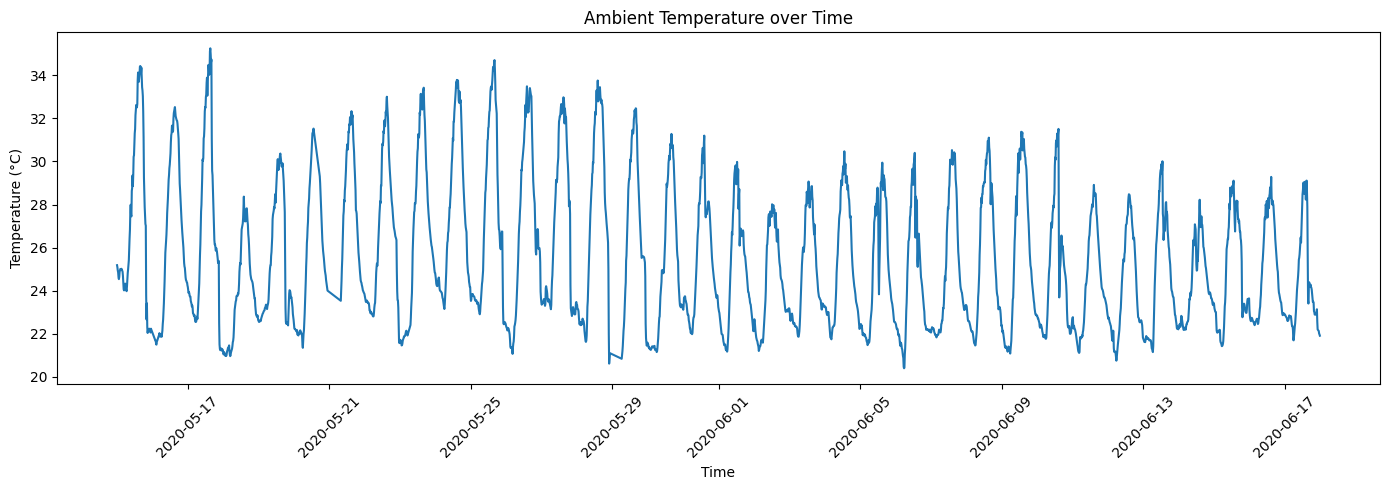

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(plant1['DATE_TIME'], plant1['DC_POWER'])
plt.title("DC Power over Time")
plt.xlabel("Time")
plt.ylabel("DC Power")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
plt.plot(plant1['DATE_TIME'], plant1['AC_POWER'])
plt.title("AC Power over Time")
plt.xlabel("Time")
plt.ylabel("AC Power")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
plt.plot(plant1['DATE_TIME'], plant1['IRRADIATION'])
plt.title("Irradiation over Time")
plt.xlabel("Time")
plt.ylabel("Irradiation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
plt.plot(plant1['DATE_TIME'], plant1['AMBIENT_TEMPERATURE'])
plt.title("Ambient Temperature over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

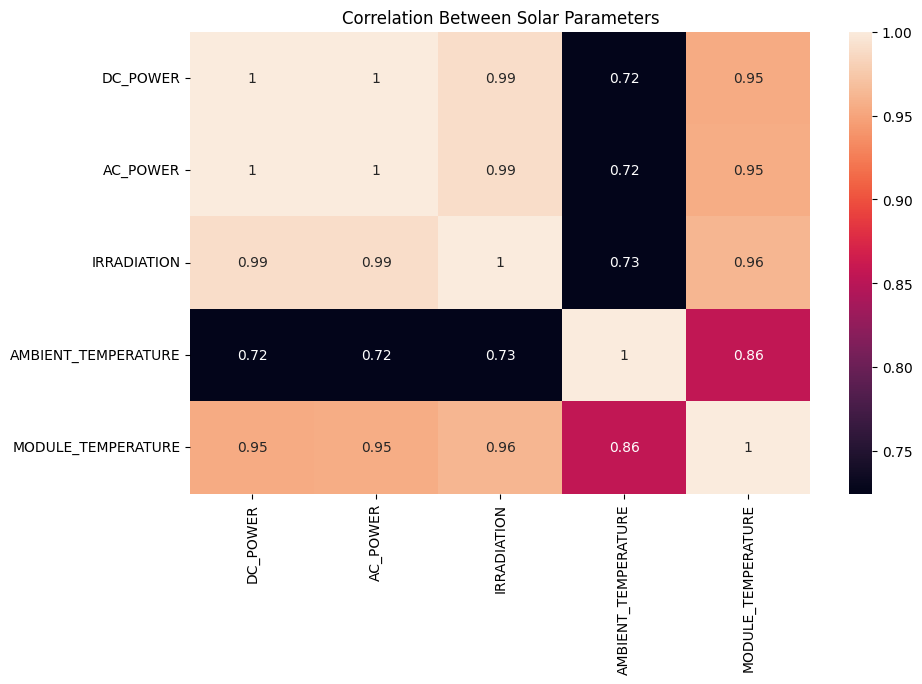

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(
    plant1[['DC_POWER','AC_POWER','IRRADIATION','AMBIENT_TEMPERATURE',
            'MODULE_TEMPERATURE']].corr(),
    annot=True
)
plt.title("Correlation Between Solar Parameters")
plt.show()

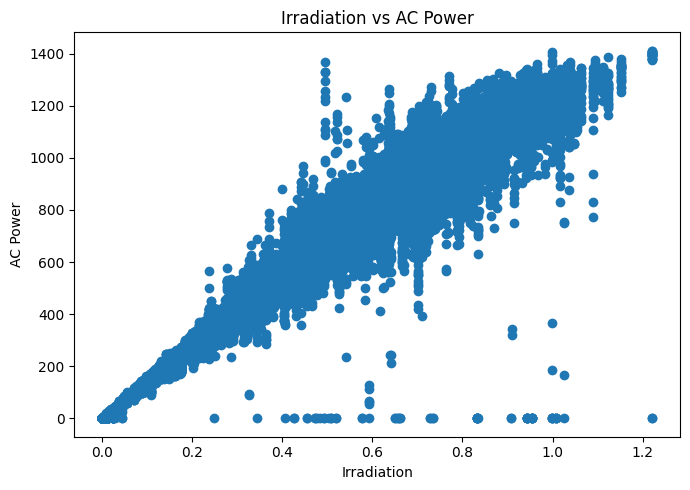

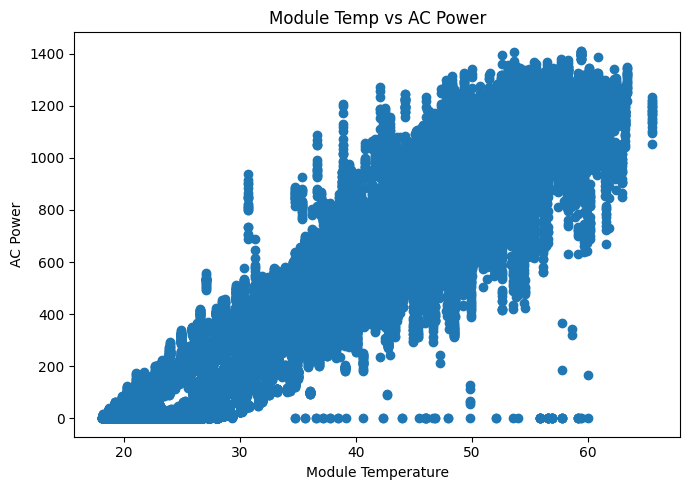

In [25]:
plt.figure(figsize=(7,5))
plt.scatter(plant1['IRRADIATION'], plant1['AC_POWER'])
plt.xlabel("Irradiation")
plt.ylabel("AC Power")
plt.title("Irradiation vs AC Power")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(plant1['MODULE_TEMPERATURE'], plant1['AC_POWER'])
plt.xlabel("Module Temperature")
plt.ylabel("AC Power")
plt.title("Module Temp vs AC Power")
plt.tight_layout()
plt.show()


# Random Forest Generator

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
features = [
    'IRRADIATION',
    'AMBIENT_TEMPERATURE',
    'MODULE_TEMPERATURE',
    'DC_POWER'
]

target = 'AC_POWER'

X = plant1[features]
y = plant1[target]

In [29]:

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,    # 20% test, 80% train
    random_state=42,  # ensures reproducible results
    shuffle=True      # shuffle data before splitting
)

In [30]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [32]:
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

MAE : 0.13259823595970502
RMSE: 1.1094473457626801
R2  : 0.9999920230841497


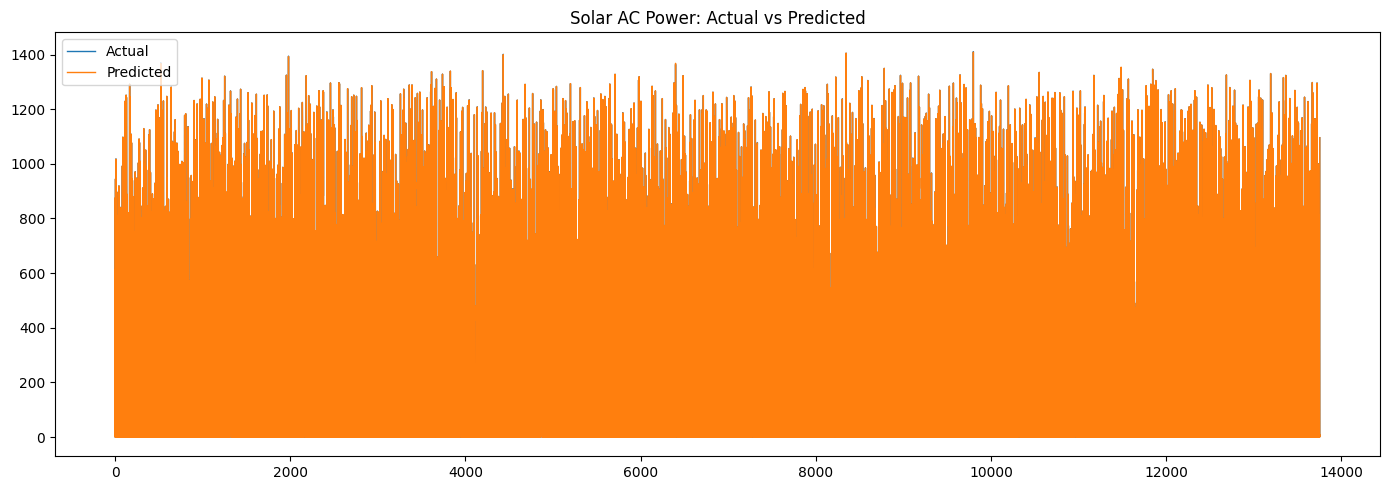

In [33]:
plt.figure(figsize=(14,5))
plt.plot(y_test.values, label='Actual', linewidth=1)
plt.plot(y_pred, label='Predicted', linewidth=1)
plt.title('Solar AC Power: Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()

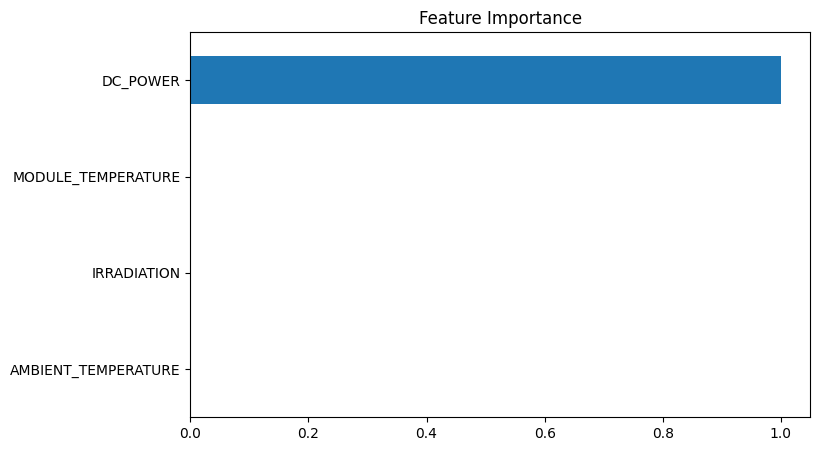

In [34]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance")
plt.show()